### Import Libraries


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os

### Import dataset

In [9]:
dataset_not_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_not_processed_v2/'
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed_v2/'
dataset_file = 'pose_array_v2.npy' 
dataset_array = np.load(dataset_not_processed_path + dataset_file)
#dataset_array[:3]
pose_array = dataset_array[:,1:8].astype(float)
pose_array[:3]

array([[ 1.26900955e-06, -1.88639280e-07,  1.00000000e-02,
         0.00000000e+00,  0.00000000e+00, -7.23014980e-02,
         9.97382822e-01],
       [ 1.27078945e-06, -1.88896765e-07,  1.00000000e-02,
         0.00000000e+00,  0.00000000e+00, -7.23014579e-02,
         9.97382825e-01],
       [ 1.27231961e-06, -1.89118124e-07,  1.00000000e-02,
         0.00000000e+00,  0.00000000e+00, -7.23014178e-02,
         9.97382828e-01]])

### Filtering Dataset with Euclidean Distance and Orientation between Poses

In [17]:
# Load the dataset
dataset_not_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_not_processed_v2/'
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed_v2/'
dataset_file = 'pose_array_v2.npy' 
dataset_array = np.load(dataset_not_processed_path + dataset_file)

# Convert the numeric columns to float
pose_array = dataset_array[:, 1:].astype(float)

# Initialize threshold for Euclidean distance and yaw angle
distance_threshold = 0.3
yaw_threshold_degree = 10  # in degrees
yaw_threshold_rad = np.radians(yaw_threshold_degree)

# Initialize array for storing IDs and poses
filtered_dataset = np.empty((0, dataset_array.shape[1]))
filtered_dataset = np.vstack((filtered_dataset, dataset_array[0]))

# Initialize index for query image
query_index = 0
query_yaw = pose_array[query_index,-1]
query_XY = pose_array[query_index,1:3]

# Compute Euclidean distance and check Yaw angle of query image with all the subsequent images
while query_index < len(dataset_array)-1:
    for i in range(query_index+1, len(dataset_array)):
        yaw_angle = pose_array[i,-1]
        position_XY = pose_array[i,:2]
        euclidean_distance = np.linalg.norm(query_XY-position_XY)
        if euclidean_distance > distance_threshold or abs(yaw_angle - query_yaw) > yaw_threshold_rad:
            # If image with distance above threshold or yaw angle difference above threshold was found, save it
            filtered_dataset = np.vstack((filtered_dataset, dataset_array[i]))
            query_index = i
            query_XY = pose_array[query_index,:2]
            query_yaw = pose_array[query_index,-1]
            break
    else:
        # If no image with distance above threshold or yaw angle difference above threshold was found, continue
        break

# Save array with dissimilar images
np.save(dataset_processed_path + 'filtered_dataset_v2.npy', filtered_dataset)

In [23]:
filtered_dataset[:3]

array([['image_0', '1.269009552309164e-06', '-1.886392804081671e-07',
        '0.01', '0.0', '0.0', '-0.0723014980372553',
        '0.9973828218801288'],
       ['image_54', '0.29540635376179325', '-0.04502663656596132',
        '0.009999999999999998', '0.0', '0.0', '-0.07902743296665639',
        '0.9968724416086044'],
       ['image_63', '0.6037751324311654', '-0.1022157128920706', '0.01',
        '0.0', '0.0', '-0.1162548625963402', '0.9932194152968951']],
      dtype='<U32')

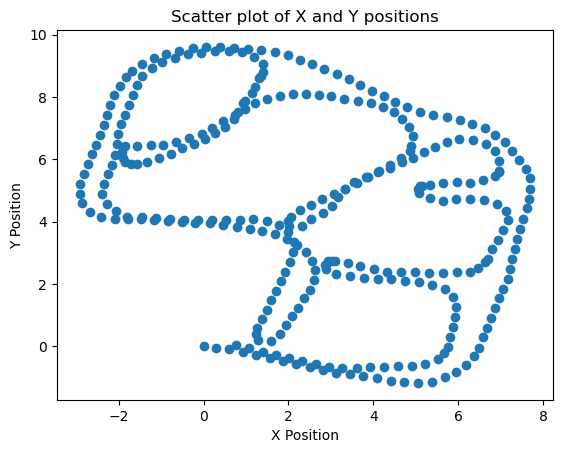

In [18]:
# Get the X and Y positions
X_positions = filtered_dataset[:, 1].astype(float)
Y_positions = filtered_dataset[:, 2].astype(float)

# Create a scatter plot of the X and Y positions
plt.scatter(X_positions, Y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Scatter plot of X and Y positions')
plt.show()

image_0
/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_not_processed_v2/image_0


In [29]:
import shutil
import os

# Load the filtered dataset
filtered_dataset = np.load(dataset_processed_path + 'filtered_dataset_v2.npy')

# Define the base path for your images and the destination directory
image_base_path = dataset_not_processed_path
destination_dir = dataset_processed_path

# Iterate over the filtered dataset
for row in filtered_dataset:
    # Get the image ID and construct the file path
    image_name = row[0]
    image_file = os.path.join(image_base_path, f'{image_name}.jpg')

    # Construct the destination file path
    destination_file = os.path.join(destination_dir)

    # Copy the image to the destination directory
    shutil.copy(image_file, destination_file)

In [30]:
filtered_dataset[:3]

array([['image_0', '1.269009552309164e-06', '-1.886392804081671e-07',
        '0.01', '0.0', '0.0', '-0.0723014980372553',
        '0.9973828218801288'],
       ['image_54', '0.29540635376179325', '-0.04502663656596132',
        '0.009999999999999998', '0.0', '0.0', '-0.07902743296665639',
        '0.9968724416086044'],
       ['image_63', '0.6037751324311654', '-0.1022157128920706', '0.01',
        '0.0', '0.0', '-0.1162548625963402', '0.9932194152968951']],
      dtype='<U32')

In [35]:
# Initialize a new array of the same shape as filtered_dataset
new_filtered_dataset = np.empty((0, filtered_dataset.shape[1]), dtype=float)

# Iterate over each row in the filtered_dataset
for i in range(filtered_dataset.shape[0]):
    # Extract the number from the first column
    first_col = float(filtered_dataset[i, 0].split('_')[1])
    
    # Convert the rest of the columns to float
    rest_cols = filtered_dataset[i, 1:].astype(float)
    
    # Concatenate the first column with the rest
    row = np.concatenate(([first_col], rest_cols))
    
    # Stack the row onto new_filtered_dataset
    new_filtered_dataset = np.vstack((new_filtered_dataset, row))
    
# Save the new filtered dataset
np.save(dataset_processed_path + 'filtered_dataset_v2.npy', new_filtered_dataset)